# Prototipo 2

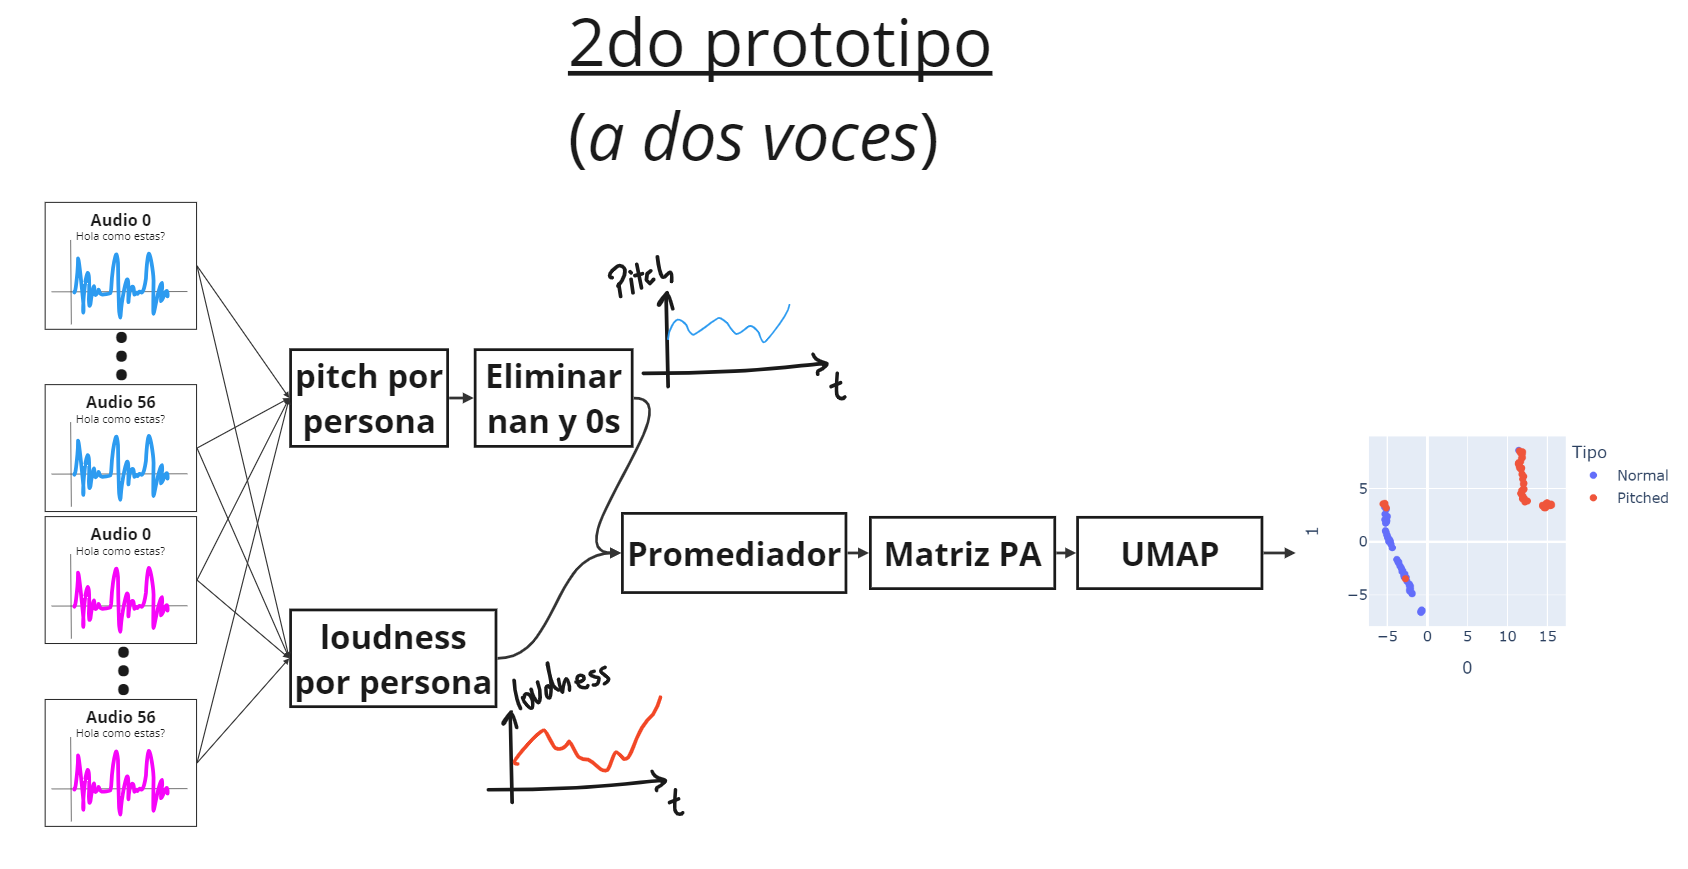

In [2]:
import librosa
import math

def PitchPorPersona(y,sr):
    f0, voiced_flag, voiced_probs=librosa.pyin(
        y,
        fmin=librosa.note_to_hz('C2'),
        fmax=librosa.note_to_hz('C7'),
        sr=sr)
    f0 = [x for x in f0 if not isinstance(x, float) or not math.isnan(x)]
    f0 = [i for i in f0 if i != 0]
    return f0

import numpy as np

def Promediador(x):
    return np.mean(x)

import pyloudnorm as pyln
import librosa 

def LoudnessPorPersona(y,sr):
    meter = pyln.Meter(sr)
    loudness = meter.integrated_loudness(y)
    return loudness

In [15]:
import pandas as pd
import soundfile as sf

def CalculadoraParametrosAcusticos(path_carpeta, nombre, cant_audios, extension, cant_basesdedatos,elementos):
    df = pd.DataFrame(columns=['Pitch', 'Loudness', 'Tipo', 'Archivo'])
    curvas_pitch = []
    for j in range(cant_basesdedatos):
        for elemento in elementos:
            name = f'{nombre[j]}{elemento}'
            path = f'{path_carpeta}/{nombre[j]}{elemento}.{extension[j]}'    
            y,sr = sf.read(path)
            P = PitchPorPersona(y,sr)
            curvas_pitch.append(P)
            p = Promediador(P)
            l = Promediador(LoudnessPorPersona(y,sr))
            if j==0:
                variable_tipo = 'Normal' 
            elif j==1:
                variable_tipo = 'Pitched'
            df = df.append({'Pitch':p, 'Loudness':l,'Tipo':variable_tipo,'Archivo':name},ignore_index=True)
    return df,curvas_pitch

Si pongo esto en el cmd anda joya

C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo2/Audios

ffmpeg -i HolaComoEstas0.opus HolaComoEstas0.wav

In [16]:
my_list = [f'ffmpeg -i HolaComoEstas{i}.opus HolaComoEstas{i}.wav' for i in range(57)]

with open("CopiarEnCMD.txt", "w") as file:
    for item in my_list:
        file.write(f"{str(item)}/n")

In [17]:
path_carpeta = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo2/Outliers'
nombre = ['HolaComoEstasPitched']
extension = ['wav']
cant_audios = 6
elementos = [15,39,40,41,42,56]
cant_basesdedatos = 1

BaseDeDatos,curva_pitch=CalculadoraParametrosAcusticos(path_carpeta,nombre,cant_audios,extension,cant_basesdedatos,elementos)

C:\Users\Asus\AppData\Local\Temp\ipykernel_2600\1619521542.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Asus\AppData\Local\Temp\ipykernel_2600\1619521542.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Asus\AppData\Local\Temp\ipykernel_2600\1619521542.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Asus\AppData\Local\Temp\ipykernel_2600\1619521542.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Asus\AppData\Local\Temp\ipykernel_2600\1619521542.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [18]:

# Specify the file path
file_path = "C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo2/outputOutliers.csv"

# Export DataFrame to a CSV file
BaseDeDatos.to_csv(file_path, index=False)

print(f"The DataFrame has been exported to {file_path}")


The DataFrame has been exported to C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/Prototipos/Prototipo2/outputOutliers.csv


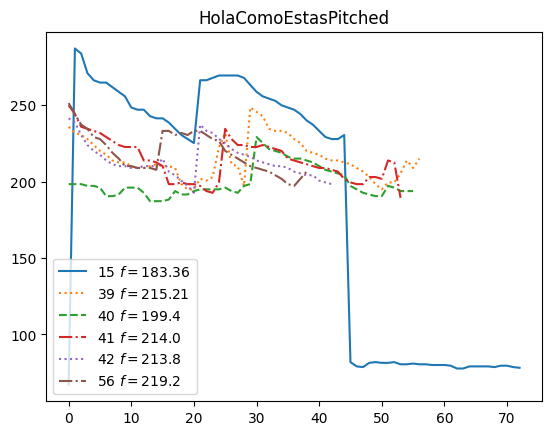

In [40]:
import matplotlib.pyplot as plt
linestyle_str = ['solid','dotted','dashed','dashdot',':','-.']

figsize=(8, 6)

for i in range(len(curva_pitch)):
    plt.plot(curva_pitch[i],linestyle=linestyle_str[i])
    plt.title('HolaComoEstasPitched')
    plt.legend(['15 $f = 183.36$','39 $f = 215.21$','40 $f = 199.4$','41 $f = 214.0$','42 $f = 213.8$','56 $ f = 219.2$'])
plt.show()

HolaComoEstasPitched15.wav --> 183.36413028274396

HolaComoEstasPitched39.wav --> 215.21410832815417

HolaComoEstasPitched40.wav --> 199.411831467146

HolaComoEstasPitched41.wav --> 214.06288224115949

HolaComoEstasPitched42.wav --> 213.80767964866024

HolaComoEstasPitched56.wav --> 219.2971853991702


In [19]:
import umap.umap_ as umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

reducer = umap.UMAP()
pitch = BaseDeDatos['Pitch']
pitch = np.asarray(pitch)
pitch = pitch.reshape(-1, 1)
scaled_pitch = StandardScaler().fit_transform(pitch) # estandariza los valores

embedding = reducer.fit_transform(pitch) 

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



In [9]:
Archivo = BaseDeDatos['Archivo'].tolist()
Pitch = BaseDeDatos['Pitch'].tolist()

In [11]:
print(Pitch)

[183.36413028274396, 215.21410832815417, 199.411831467146, 214.06288224115949, 213.80767964866024, 219.2971853991702]


In [10]:
import plotly.express as px

fig = px.scatter(
    embedding,
    x=0,
    y=1,
    color=BaseDeDatos.Tipo,
    labels={'color': 'Tipo'},
    hover_data=[Archivo,Pitch]
)

fig.update_layout(
    title='Scatter plot MapaDeVoces',
    xaxis_title='X',
    yaxis_title='Y',
    autosize=True,
    width=800,
    height=500
)
fig.show()

Los outliers con este método son los siguientes:

Outliers del cluster azul:
1) HolaComoEstasPitchedd15.wav (f=183.36)
2) HolaComoEstasPitched39.wav (f=215.21)
3) HolaComoEstasPitched40.wav (f=199.41)
4) HolaComoEstasPitched41.wav (f=214.06)
5) HolaComoEstasPitched42.wav (f=213.8)
6) HolaComoEstasPitched56.wav (f=219.3)